<a href="https://colab.research.google.com/github/Sajanm2058/Acoustic-Signal-Based-Binary-Classification-for-Brick-Wall-Inspection-by-Hammering-Test/blob/main/HIt_vibration_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Paths
good_path = '/content/drive/My Drive/Hammering_Test/good_bricks'
bad_path = '/content/drive/My Drive/Hammering_Test/bad_bricks'

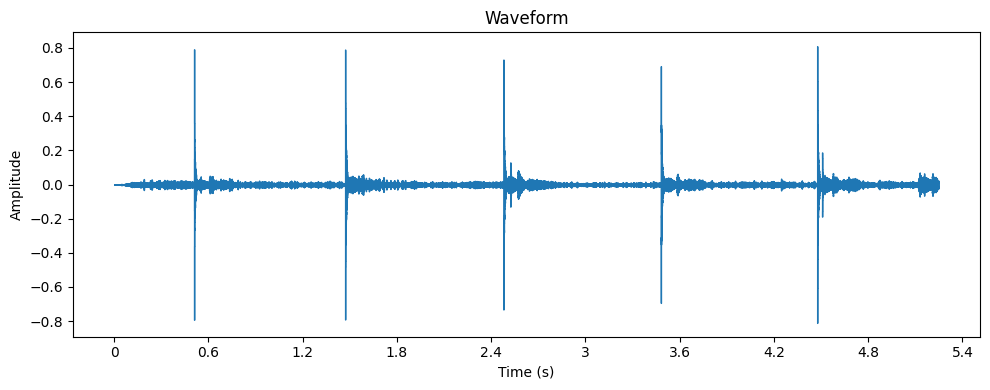

In [ ]:
y, sr = librosa.load("/content/sample_304.wav")

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

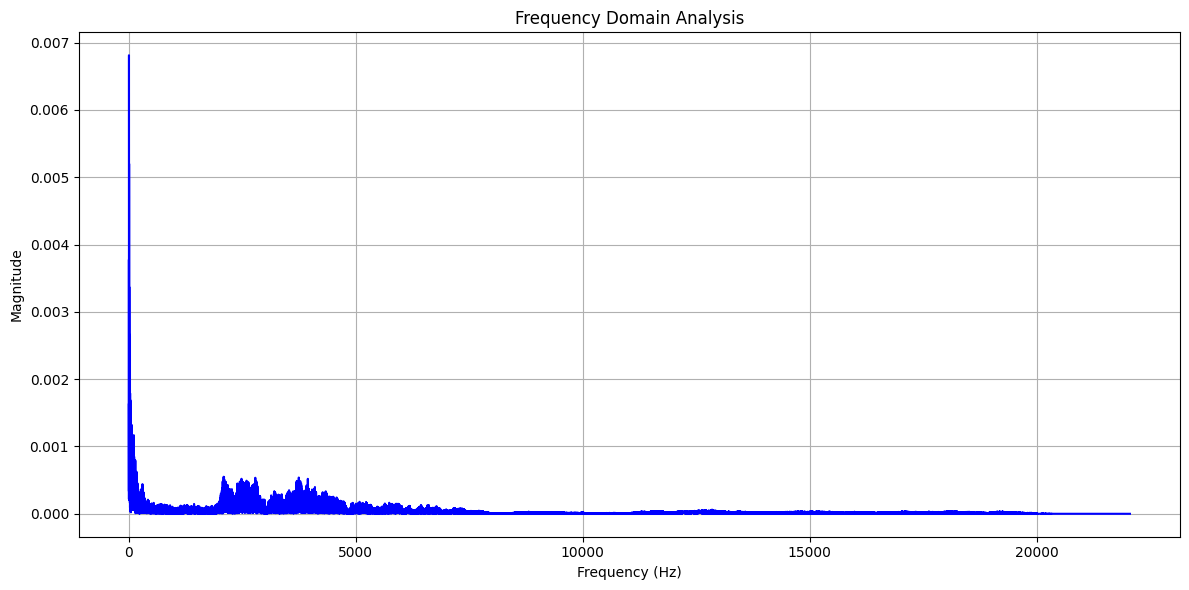

In [ ]:
import scipy.io.wavfile as wavfile
from scipy.fft import fft
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
file_path = 'sample_304.wav'  # Replace with your file path
sr, y = wavfile.read(file_path)

# If stereo, convert to mono by averaging channels
if len(y.shape) == 2:
    y = y.mean(axis=1)

# Normalize audio
y = y / np.max(np.abs(y))

# FFT computation
N = len(y)
yf = fft(y)
xf = np.linspace(0.0, sr / 2.0, N // 2)

# Plot frequency domain
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]), color='blue')
plt.title("Frequency Domain Analysis")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()


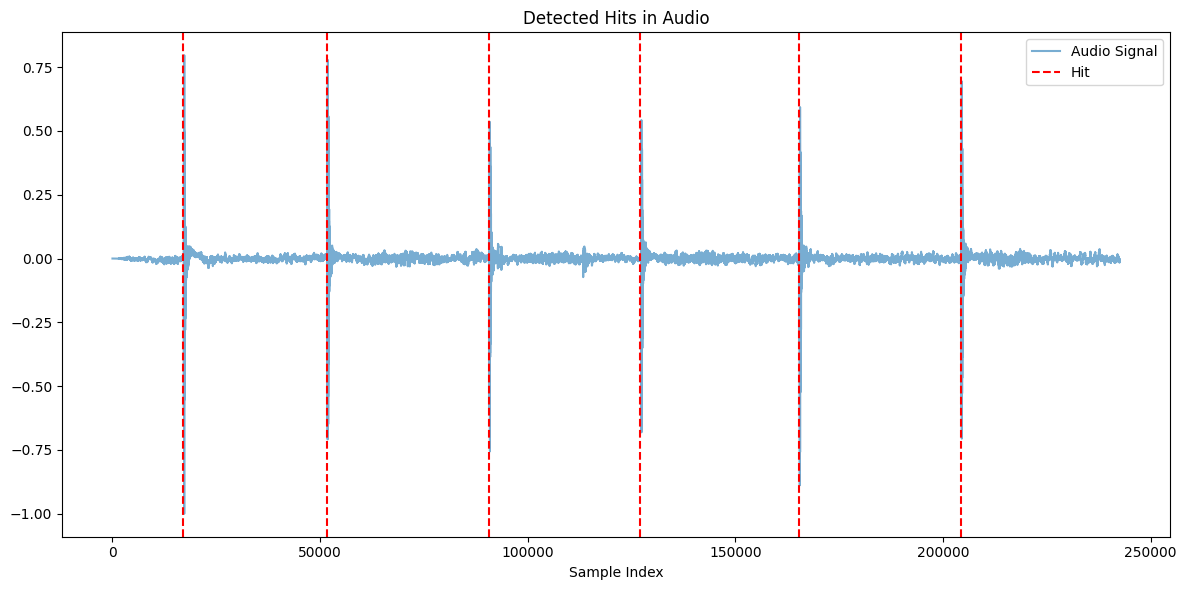

In [ ]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load audio
file_path = 'sample_304.wav'
sr, y = wavfile.read(file_path)

# Convert stereo to mono
if len(y.shape) == 2:
    y = y.mean(axis=1)

# Normalize
y = y / np.max(np.abs(y))

# Parameters for framing
frame_size = 1024
hop_size = 512

# Compute short-time energy
energy = np.array([
    np.sum(np.abs(y[i:i+frame_size])**2)
    for i in range(0, len(y) - frame_size, hop_size)
])

# Find peaks (hits)
peaks, _ = find_peaks(energy, height=np.max(energy)*0.3, distance=20)

# Convert frame indices to sample indices
hit_positions = [p * hop_size for p in peaks]

# Duration of hit and vibration in samples
hit_duration = int(0.02 * sr)         # 20ms for hit
vibration_duration = int(0.1 * sr)    # 100ms for vibration

# Extract and plot
plt.figure(figsize=(12, 6))
plt.plot(y, alpha=0.6, label="Audio Signal")
for pos in hit_positions:
    plt.axvline(pos, color='red', linestyle='--', label="Hit" if pos == hit_positions[0] else "")
plt.title("Detected Hits in Audio")
plt.xlabel("Sample Index")
plt.legend()
plt.tight_layout()
plt.show()

# Optionally save each hit and vibration
import soundfile as sf
for i, pos in enumerate(hit_positions):
    hit = y[pos:pos+hit_duration]
    vib = y[pos+hit_duration:pos+hit_duration+vibration_duration]

    if len(hit) > 0:
        sf.write(f"hit_{i}.wav", hit, sr)
    if len(vib) > 0:
        sf.write(f"vibration_{i}.wav", vib, sr)


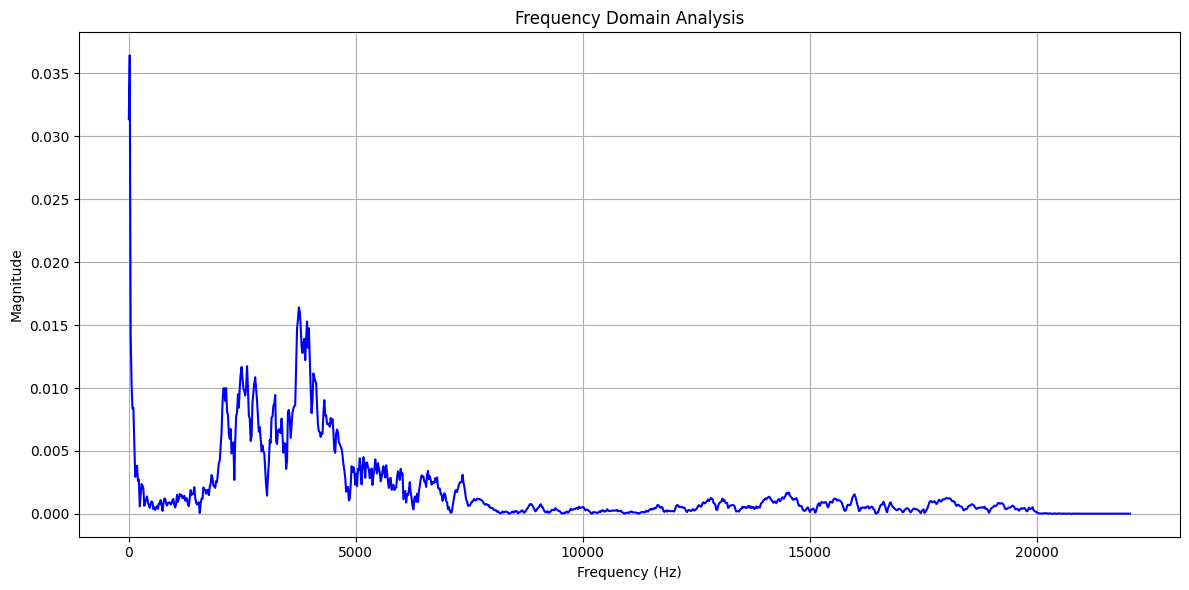

In [ ]:
import scipy.io.wavfile as wavfile
from scipy.fft import fft
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
file_path = 'hit_0.wav'  # Replace with your file path
sr, y = wavfile.read(file_path)

# If stereo, convert to mono by averaging channels
if len(y.shape) == 2:
    y = y.mean(axis=1)

# Normalize audio
y = y / np.max(np.abs(y))

# FFT computation
N = len(y)
yf = fft(y)
xf = np.linspace(0.0, sr / 2.0, N // 2)

# Plot frequency domain
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]), color='blue')
plt.title("Frequency Domain Analysis")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

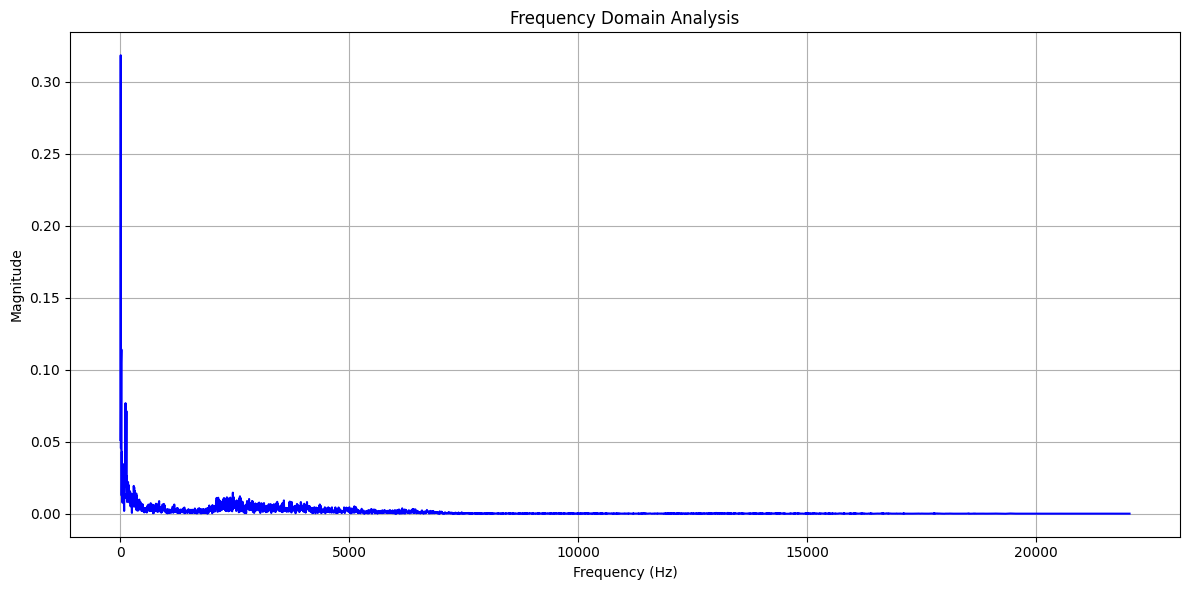

In [ ]:
import scipy.io.wavfile as wavfile
from scipy.fft import fft
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
file_path = 'vibration_0.wav'  # Replace with your file path
sr, y = wavfile.read(file_path)

# If stereo, convert to mono by averaging channels
if len(y.shape) == 2:
    y = y.mean(axis=1)

# Normalize audio
y = y / np.max(np.abs(y))

# FFT computation
N = len(y)
yf = fft(y)
xf = np.linspace(0.0, sr / 2.0, N // 2)

# Plot frequency domain
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]), color='blue')
plt.title("Frequency Domain Analysis")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()


--- Time-Domain Features ---
     Mean    RMS  Variance  Skewness  Kurtosis  Crest Factor
0 -0.0137 0.0725    0.0051   -1.0169   69.2297       13.7959

--- Frequency-Domain Features ---
   Spectral Centroid  Spectral Entropy  Peak Frequency 1  Peak Frequency 2  \
0          4920.6117            4.1515           20.0272          100.1362   

   Peak Frequency 3  Peak Frequency 4  Peak Frequency 5  
0          180.2452         2102.8610         2142.9155  


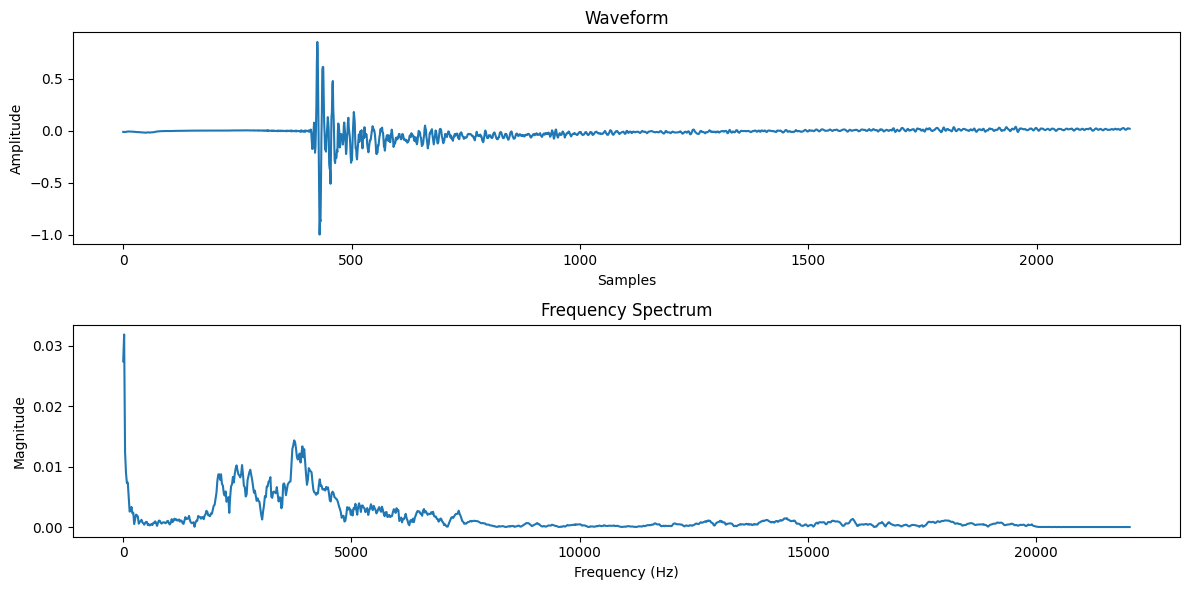

In [ ]:
import numpy as np
import librosa
import scipy.stats
from scipy.signal import find_peaks
from scipy.fft import fft
import pandas as pd
import matplotlib.pyplot as plt

# Load audio file
audio_path = 'hit_0.wav'  # <-- Replace with your .wav file
y, sr = librosa.load(audio_path, sr=None)

# ===============================
# TIME-DOMAIN FEATURES
# ===============================
mean_val = np.mean(y)
rms_val = np.sqrt(np.mean(y**2))
variance_val = np.var(y)
skewness_val = scipy.stats.skew(y)
kurtosis_val = scipy.stats.kurtosis(y)
peak_val = np.max(np.abs(y))
crest_factor = peak_val / rms_val

time_features = {
    "Mean": mean_val,
    "RMS": rms_val,
    "Variance": variance_val,
    "Skewness": skewness_val,
    "Kurtosis": kurtosis_val,
    "Crest Factor": crest_factor
}
time_df = pd.DataFrame([time_features])

# ===============================
# FREQUENCY-DOMAIN FEATURES
# ===============================
N = len(y)
yf = fft(y)
xf = np.linspace(0.0, sr / 2, N // 2)
magnitude = 2.0 / N * np.abs(yf[:N // 2])

# Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0].mean()

# Spectral Entropy
def spectral_entropy(signal, sr):
    fft_vals = np.abs(np.fft.fft(signal))**2
    total_energy = np.sum(fft_vals)
    if total_energy == 0:
        return 0
    energy = fft_vals[:len(fft_vals)//2]
    energy /= total_energy
    entropy = -np.sum(energy * np.log2(energy + 1e-12))
    return entropy

spectral_entropy_val = spectral_entropy(y, sr)

# Peak Frequencies
peaks, _ = find_peaks(magnitude, height=np.max(magnitude) * 0.1)
peak_freqs = xf[peaks]
top_peaks = list(peak_freqs[:5]) + [np.nan] * (5 - len(peak_freqs))

freq_features = {
    "Spectral Centroid": spectral_centroid,
    "Spectral Entropy": spectral_entropy_val,
    "Peak Frequency 1": top_peaks[0],
    "Peak Frequency 2": top_peaks[1],
    "Peak Frequency 3": top_peaks[2],
    "Peak Frequency 4": top_peaks[3],
    "Peak Frequency 5": top_peaks[4]
}
freq_df = pd.DataFrame([freq_features])

# Format display
pd.set_option("display.float_format", "{:.4f}".format)

# ===============================
# DISPLAY TABLES
# ===============================
print("\n--- Time-Domain Features ---")
print(time_df)

print("\n--- Frequency-Domain Features ---")
print(freq_df)

# ===============================
# OPTIONAL: PLOT
# ===============================
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(y)
plt.title("Waveform")
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(xf, magnitude)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()




--- Time-Domain Features ---
    Mean    RMS  Variance  Skewness  Kurtosis  Crest Factor
0 0.0016 0.0182    0.0003    0.2093   -0.4729        3.3456

--- Frequency-Domain Features ---
   Spectral Centroid  Spectral Entropy  Peak Frequency 1  Peak Frequency 2  \
0          2462.5994            2.3334            5.0011           20.0045   

   Peak Frequency 3  Peak Frequency 4  Peak Frequency 5  
0           30.0068           50.0113           60.0136  


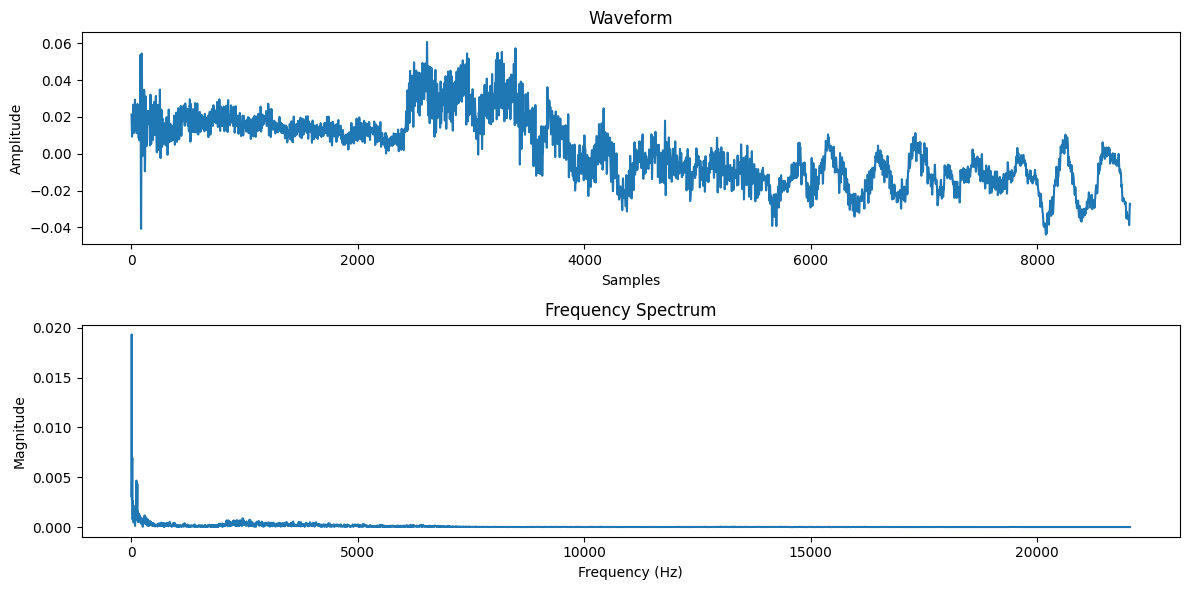

In [ ]:
# Load audio file
audio_path = 'vibration_0.wav'  # <-- Replace with your .wav file
y, sr = librosa.load(audio_path, sr=None)

# ===============================
# TIME-DOMAIN FEATURES
# ===============================
mean_val = np.mean(y)
rms_val = np.sqrt(np.mean(y**2))
variance_val = np.var(y)
skewness_val = scipy.stats.skew(y)
kurtosis_val = scipy.stats.kurtosis(y)
peak_val = np.max(np.abs(y))
crest_factor = peak_val / rms_val

time_features = {
    "Mean": mean_val,
    "RMS": rms_val,
    "Variance": variance_val,
    "Skewness": skewness_val,
    "Kurtosis": kurtosis_val,
    "Crest Factor": crest_factor
}
time_df = pd.DataFrame([time_features])

# ===============================
# FREQUENCY-DOMAIN FEATURES
# ===============================
N = len(y)
yf = fft(y)
xf = np.linspace(0.0, sr / 2, N // 2)
magnitude = 2.0 / N * np.abs(yf[:N // 2])

# Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0].mean()

# Spectral Entropy
def spectral_entropy(signal, sr):
    fft_vals = np.abs(np.fft.fft(signal))**2
    total_energy = np.sum(fft_vals)
    if total_energy == 0:
        return 0
    energy = fft_vals[:len(fft_vals)//2]
    energy /= total_energy
    entropy = -np.sum(energy * np.log2(energy + 1e-12))
    return entropy

spectral_entropy_val = spectral_entropy(y, sr)

# Peak Frequencies
peaks, _ = find_peaks(magnitude, height=np.max(magnitude) * 0.1)
peak_freqs = xf[peaks]
top_peaks = list(peak_freqs[:5]) + [np.nan] * (5 - len(peak_freqs))

freq_features = {
    "Spectral Centroid": spectral_centroid,
    "Spectral Entropy": spectral_entropy_val,
    "Peak Frequency 1": top_peaks[0],
    "Peak Frequency 2": top_peaks[1],
    "Peak Frequency 3": top_peaks[2],
    "Peak Frequency 4": top_peaks[3],
    "Peak Frequency 5": top_peaks[4]
}
freq_df = pd.DataFrame([freq_features])

# Format display
pd.set_option("display.float_format", "{:.4f}".format)

# ===============================
# DISPLAY TABLES
# ===============================
print("\n--- Time-Domain Features ---")
print(time_df)

print("\n--- Frequency-Domain Features ---")
print(freq_df)

# ===============================
# OPTIONAL: PLOT
# ===============================
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(y)
plt.title("Waveform")
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(xf, magnitude)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()


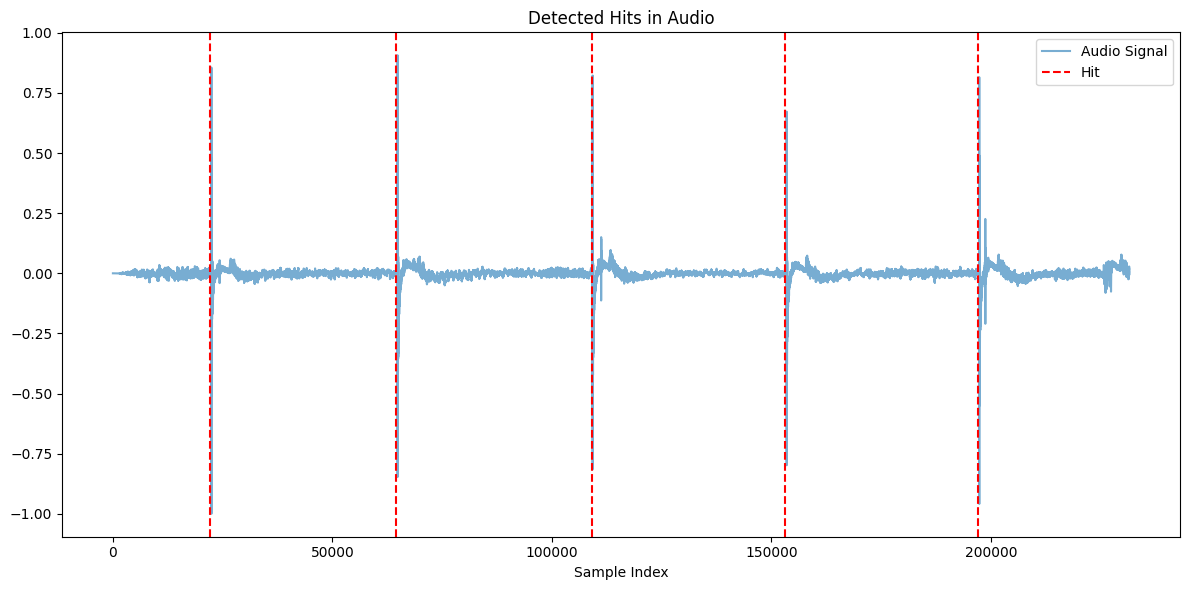

In [ ]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os
import soundfile as sf

# Load audio
file_path = 'sample_10.wav'
sr, y = wavfile.read(file_path)

# Convert stereo to mono
if len(y.shape) == 2:
    y = y.mean(axis=1)

# Normalize
y = y / np.max(np.abs(y))

# Parameters for framing
frame_size = 1024
hop_size = 512

# Compute short-time energy
energy = np.array([
    np.sum(np.abs(y[i:i+frame_size])**2)
    for i in range(0, len(y) - frame_size, hop_size)
])

# Find peaks (hits)
peaks, _ = find_peaks(energy, height=np.max(energy)*0.3, distance=20)

# Convert frame indices to sample indices
hit_positions = [p * hop_size for p in peaks]

# Duration of hit and vibration in samples
hit_duration = int(0.05 * sr)         # 50ms for hit
vibration_duration = int(0.2 * sr)    # 200ms for vibration

# Create directories for saving hits and vibrations
hit_dir = "hits"
vib_dir = "vibrations"

os.makedirs(hit_dir, exist_ok=True)
os.makedirs(vib_dir, exist_ok=True)

# Extract and plot
plt.figure(figsize=(12, 6))
plt.plot(y, alpha=0.6, label="Audio Signal")
for pos in hit_positions:
    plt.axvline(pos, color='red', linestyle='--', label="Hit" if pos == hit_positions[0] else "")
plt.title("Detected Hits in Audio")
plt.xlabel("Sample Index")
plt.legend()
plt.tight_layout()
plt.show()

# Save each hit and vibration clip in their respective folders
for i, pos in enumerate(hit_positions):
    hit = y[pos:pos+hit_duration]
    vib = y[pos+hit_duration:pos+hit_duration+vibration_duration]

    if len(hit) > 0:
        sf.write(os.path.join(hit_dir, f"hit_{i}.wav"), hit, sr)
    if len(vib) > 0:
        sf.write(os.path.join(vib_dir, f"vibration_{i}.wav"), vib, sr)
